In [1]:
# pip install -e ./report_package

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

df = pd.DataFrame([[1], [2], [3]])

In [4]:
from IPython.display import Javascript, HTML, display

HTML(df.to_html(index=False))

0
1
2
3


In [5]:
import matplotlib.pyplot as plt
import base64
import io

# Create a sample plot
plt.plot([1, 2, 3], [4, 5, 6])

# Save the plot to a base64 encoded string
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
string = base64.b64encode(buf.read())
plt.close()

# Decode the base64 bytes to string
base64_string = string.decode('utf-8')
HTML(f"""
<img style='display:block;' id='base64image'
       src='data:image/jpeg;base64, {base64_string}' />
""")


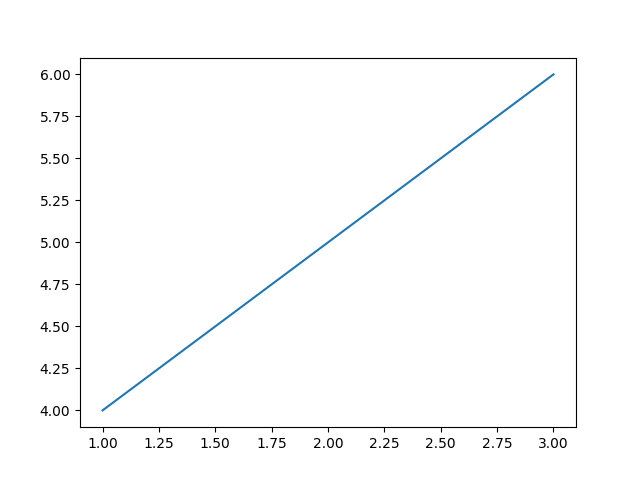

In [8]:
from model_report.document import HTMLReport

report = HTMLReport("Sales Report")
report.add_heading("Monthly Sales Report", 1)
report.add_paragraph("This report contains the sales data for the month.")
report.add_table([
    ["Product", "Quantity", "Revenue"],
    ["Laptop", 5, "$5000"],
    ["Mouse", 10, "$500"]
], title='mine')
report.add_dataframe(df, title='test')
report.add_list(["Increase marketing", "Improve customer support", "Expand product line"], ordered=True)
    
# Example of adding a matplotlib figure
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])
report.add_figure(fig)
plt.close()

HTML(report.render())